In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Working with Perfectly Linear Dataset

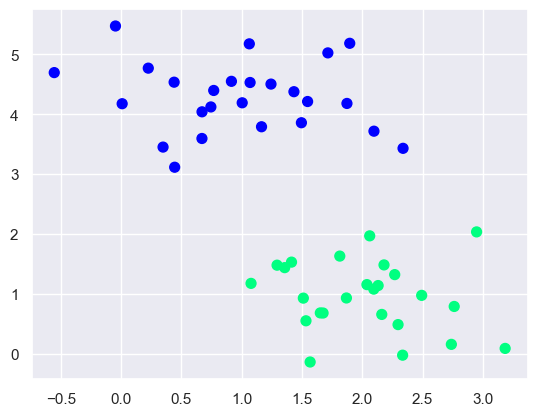

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

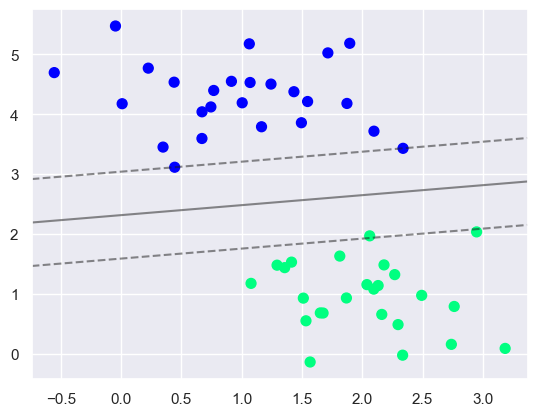

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

## Almost Linearly Separable Dataset

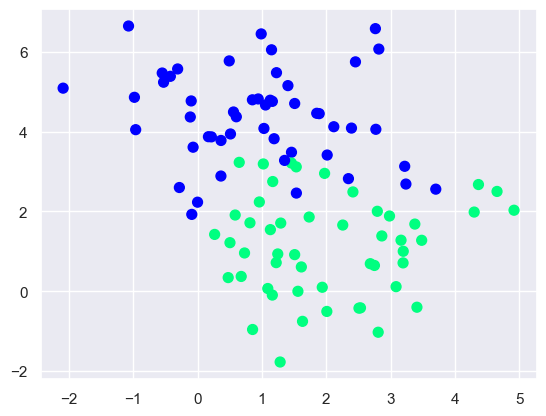

In [7]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

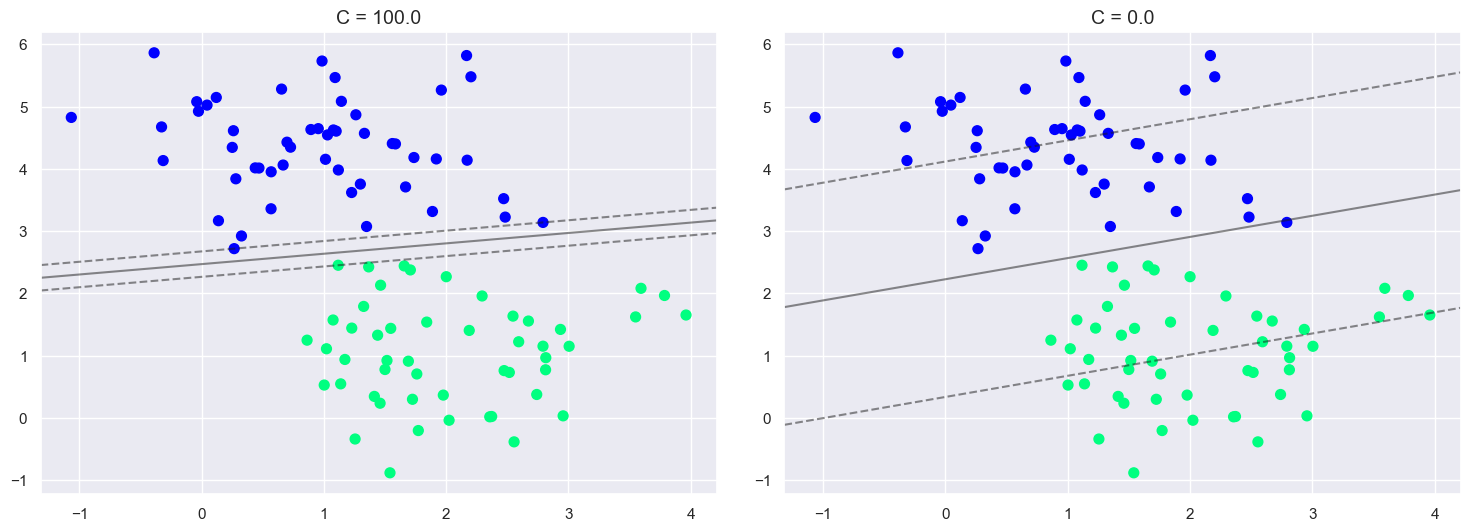

In [8]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Mushroom Dataset

In [9]:
data = pd.read_csv('mushrooms.csv')

In [10]:
data.shape

(8124, 23)

In [11]:
X = data.drop(columns='class')

In [12]:
y = data['class']

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [14]:
import pandas as pd

def encode_features(data, encoder):
    df_encoded = pd.DataFrame()
    for column in data.columns:
        if column != 'class':  # Exclude the target variable if it exists
            df_encoded[column] = encoder.fit_transform(data[column])
    return df_encoded

df_encoded = encode_features(data, encoder)
df_encoded['class'] = data['class']  

# Now df_encoded contains all encoded features along with the target variable 'class'


In [15]:
df2=df_encoded

In [16]:
df2

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,p
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,e
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,e
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,p
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,e
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,e
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,e
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,p


In [17]:
X = df2.drop(columns='class')
y = df2['class']

In [18]:
x_train , x_test, y_train,y_test = train_test_split(X,y,random_state = 20)

In [19]:
from sklearn.svm import SVC

In [20]:
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [21]:
svc.score(x_test,y_test)

0.9911373707533235

In [22]:
#sns.pairplot(df2, hue='class')

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

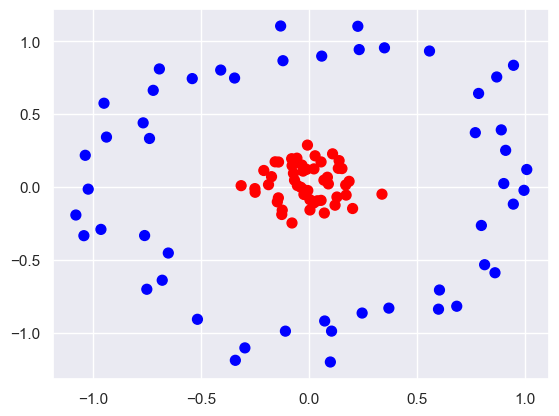

In [24]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [26]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

# Define colormap
zero_one_colourmap = ListedColormap(['blue', 'red'])

def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, 
                                   stop=X_set[:, 0].max() + 1, 
                                   step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, 
                                   stop=X_set[:, 1].max() + 1, 
                                   step=0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                               X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, 
                 cmap=zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=[zero_one_colourmap(i)], label=j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

# Example usage:
# X and y should be your data and labels, and clf should be your trained SVM classifier
# plot_decision_boundary(X, y, clf)


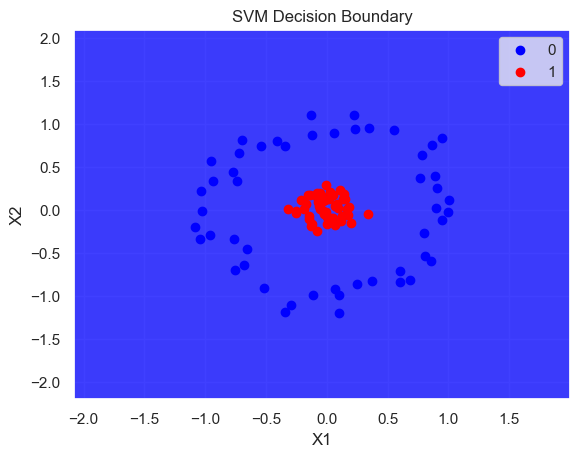

In [29]:
plot_decision_boundary(X, y, classifier)

In [30]:
def plot_3d_plot(X, y):
 r = np.exp(-(X ** 2).sum(1))
 ax = plt.subplot(projection='3d')
 ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
 ax.set_xlabel('X1')
 ax.set_ylabel('X2')
 ax.set_zlabel('y')
 rbf_classifier = SVC(kernel="rbf")
 rbf_classifier.fit(X_train, y_train)
 y_pred = rbf_classifier.predict(X_test)
 return ax, rbf_classifier

(<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>, SVC())

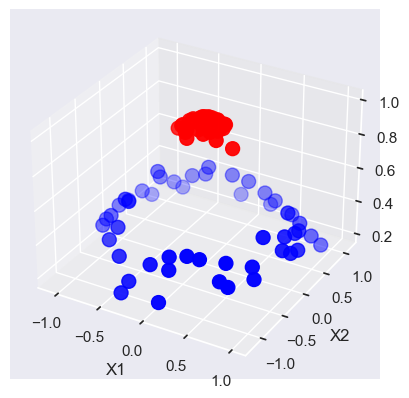

In [31]:
plot_3d_plot(X,y)

In [32]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

1.0

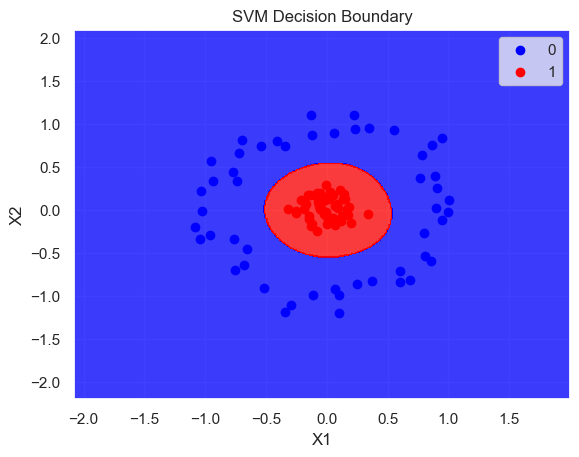

In [34]:
plot_decision_boundary(X, y, rbf_classifier)

In [35]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

1.0

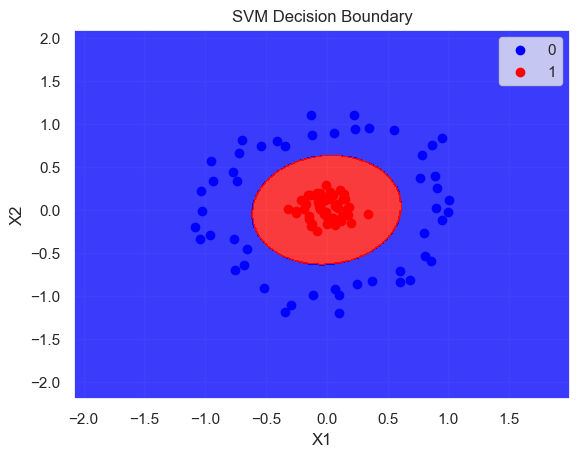

In [37]:
plot_decision_boundary(X, y, poly_classifier)

In [38]:
X

array([[-0.05459277,  0.00936684],
       [ 0.34857064,  0.95506157],
       [-0.05670649,  0.19724758],
       [-1.0429529 , -0.33499484],
       [ 0.1036395 , -0.99044455],
       [ 0.05506533,  0.1716154 ],
       [ 0.33705316, -0.04997426],
       [-0.1575562 ,  0.1722407 ],
       [-0.12131066,  0.86670968],
       [ 0.60326485, -0.70817826],
       [-0.25009257, -0.0367961 ],
       [ 0.17109976, -0.05624441],
       [-0.14262689, -0.07534606],
       [ 0.78437177,  0.64184551],
       [-0.25126585, -0.01176522],
       [-0.94986812,  0.5746776 ],
       [ 0.55713931,  0.93318911],
       [-0.0222478 , -0.02084216],
       [-0.20997505,  0.1127114 ],
       [-0.0283663 ,  0.10835236],
       [ 0.79722014, -0.26489652],
       [-0.03354415,  0.1499092 ],
       [ 0.22528645,  1.10310681],
       [ 0.24521034, -0.86642411],
       [ 0.9460335 ,  0.83519091],
       [-0.02430975, -0.05201834],
       [ 0.05810961,  0.89819136],
       [ 0.07183052, -0.9209024 ],
       [-0.12468264,

In [39]:
np.exp(-(X**2)).sum(1)

array([1.99693633, 1.28725243, 1.95863007, 1.23081979, 1.36425966,
       1.96795003, 1.89011631, 1.94625051, 1.45719829, 1.30055248,
       1.93801654, 1.9679908 , 1.97420214, 1.20285868, 1.93867876,
       1.12439704, 1.15174952, 1.99907086, 1.94424479, 1.98752409,
       1.46187401, 1.97665329, 1.24667568, 1.41368428, 0.90642251,
       1.99670696, 1.44293619, 1.42309806, 1.95945437, 1.96496536,
       1.20271085, 1.9513286 , 1.13187884, 1.44357559, 1.97515989,
       1.37079698, 1.13696878, 1.20977413, 1.35864514, 1.99933967,
       1.31316664, 1.97163406, 1.23797026, 1.98846067, 1.96152162,
       1.39537544, 1.18338837, 1.3210908 , 1.37136005, 1.97879034,
       1.97010587, 1.45938713, 1.95668051, 1.9726114 , 1.47433763,
       1.9546439 , 1.27483731, 1.03607072, 1.46716129, 1.98602054,
       1.98849386, 1.98952369, 1.94878534, 1.99850769, 1.27763003,
       1.98431677, 1.99320948, 1.98746114, 1.96516128, 1.99328489,
       1.37803748, 1.92082776, 1.17848008, 1.42385083, 1.93806

In [40]:
X_new=np.exp(-(X**2))

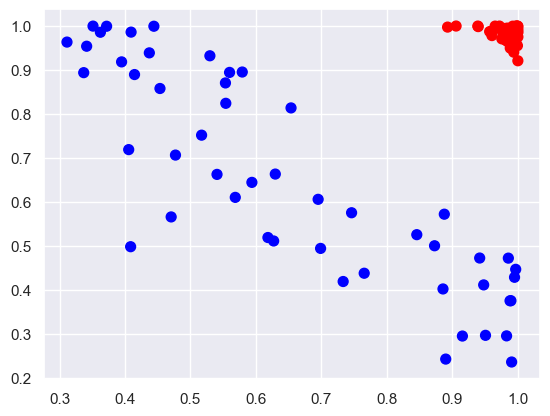

In [41]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')